In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [62]:
df = pd.read_csv('HRdata.csv')
df.head()

,Unnamed: 0,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46


In [63]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.columns

Index(['Gender', 'Age', 'Senior', 'Region', 'Department', 'Statu', 'Martial',
       'Education Level', 'Disability', 'Salary'],
      dtype='object')

In [5]:
df.head()

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46


In [6]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [7]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Gender,object,0,0.0,2,[Male],0.33
1,Age,int64,0,0.0,41,"[36, 39, 32]",6.82
2,Senior,int64,0,0.0,22,"[6, 0, 12]",3.66
3,Region,object,0,0.0,2,[Region 1],0.33
4,Department,object,0,0.0,29,"[Department ID: 4, Department ID: 12, Departme...",4.83
5,Statu,object,0,0.0,2,"[White-Collar, Blue-Collar]",0.33
6,Martial,object,0,0.0,2,"[Married, Single]",0.33
7,Education Level,object,0,0.0,7,"[Education Level: 4, Education Level: 2, Educa...",1.16
8,Disability,object,0,0.0,2,[No],0.33
9,Salary,float64,0,0.0,443,"[4793.98, 4825.66, 5407.91]",73.71


In [8]:
df.groupby(['Age', 'Gender', 'Department', 'Education Level'])['Salary'].mean().reset_index().sort_values('Salary')

,Age,Gender,Department,Education Level,Salary
474,58,Male,Department ID: 23,Education Level: 1,3497.10
457,51,Male,Department ID: 23,Education Level: 3,3497.10
228,34,Male,Department ID: 14,Education Level: 3,3497.97
46,24,Male,Department ID: 3,Education Level: 5,3497.97
32,23,Male,Department ID: 4,Education Level: 5,3497.97
...,...,...,...,...,...
417,46,Male,Department ID: 21,Education Level: 7,42995.65
476,62,Male,Department ID: 25,Education Level: 6,50358.97
339,39,Male,Department ID: 9,Education Level: 7,54040.65
441,48,Male,Department ID: 8,Education Level: 6,57722.32


In [9]:
df.groupby(['Gender', 'Department', 'Education Level','Statu'])['Age'].mean().reset_index().sort_values('Age')

,Gender,Department,Education Level,Statu,Age
11,Female,Department ID: 17,Education Level: 6,White-Collar,24.000000
9,Female,Department ID: 14,Education Level: 6,White-Collar,25.000000
25,Female,Department ID: 3,Education Level: 4,Blue-Collar,25.000000
27,Female,Department ID: 4,Education Level: 6,White-Collar,25.000000
113,Male,Department ID: 4,Education Level: 5,Blue-Collar,25.500000
...,...,...,...,...,...
40,Male,Department ID: 11,Education Level: 6,White-Collar,52.000000
95,Male,Department ID: 24,Education Level: 6,White-Collar,52.333333
47,Male,Department ID: 12,Education Level: 5,White-Collar,53.000000
78,Male,Department ID: 20,Education Level: 2,Blue-Collar,54.000000


In [10]:
df.groupby(['Department'])['Salary'].mean().reset_index().sort_values('Salary')

,Department,Salary
21,Department ID: 29,4584.130000
15,Department ID: 23,4937.572642
3,Department ID: 12,5171.293243
22,Department ID: 3,5212.593017
23,Department ID: 4,5238.106387
24,Department ID: 5,5429.822500
5,Department ID: 14,5467.386829
7,Department ID: 16,5484.822000
0,Department ID: 1,5669.284286
6,Department ID: 15,5761.166552


In [11]:
df.groupby(['Education Level'])['Salary'].mean().reset_index().sort_values('Salary')

,Education Level,Salary
3,Education Level: 4,5125.208750
1,Education Level: 2,5135.319549
2,Education Level: 3,5383.478197
0,Education Level: 1,5436.033731
4,Education Level: 5,6022.504359
5,Education Level: 6,11596.662778
6,Education Level: 7,18491.347857


In [12]:
df.groupby(['Education Level'])['Age'].mean().reset_index().sort_values('Age')

,Education Level,Age
4,Education Level: 5,30.282051
3,Education Level: 4,31.463235
1,Education Level: 2,33.406015
5,Education Level: 6,34.500000
2,Education Level: 3,34.868852
6,Education Level: 7,36.285714
0,Education Level: 1,41.820896


In [13]:
ageCut = pd.cut(df.Age, [0,20,35,45,65],labels=['18-20','21-35','36-45','46-65']).value_counts().reset_index()
ageCut.columns = ['Age Range','Count']

In [14]:
#Membuat Range Umur
Range_Age = pd.cut(df.Age, [0,20,35,45,65], labels=['18-20', '21-35', '36-45', '46-65']).value_counts().reset_index()
Range_Age.columns = ['Range Age', 'Count']

In [15]:
Range_Age.sort_values('Range Age')

,Range Age,Count
3,18-20,7
0,21-35,349
1,36-45,177
2,46-65,68


<function matplotlib.pyplot.show(*args, **kw)>

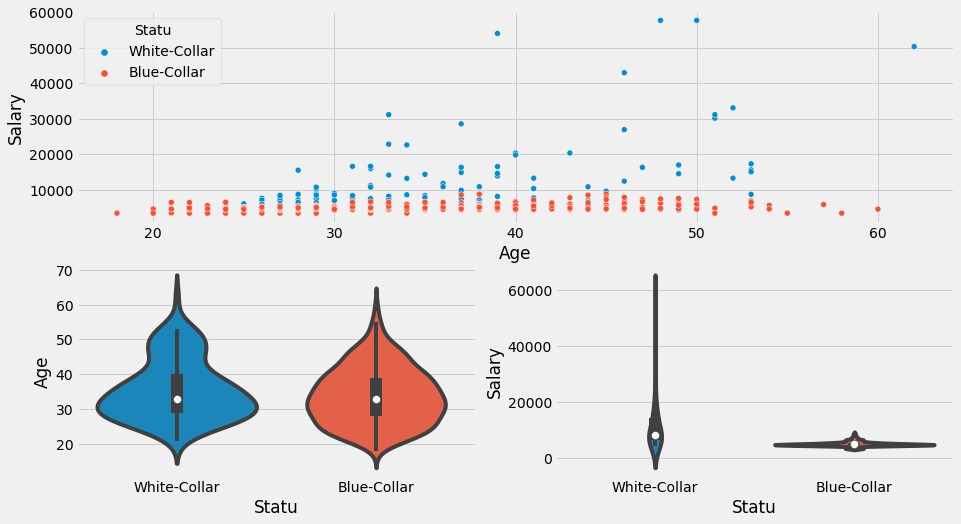

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,(1,2))
sns.scatterplot(data = df, x='Age', y='Salary', hue='Statu')
plt.subplot(2,2,3)
sns.violinplot(data = df, x='Statu', y='Age')
plt.subplot(2,2,4)
sns.violinplot(data = df, x='Statu', y='Salary')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

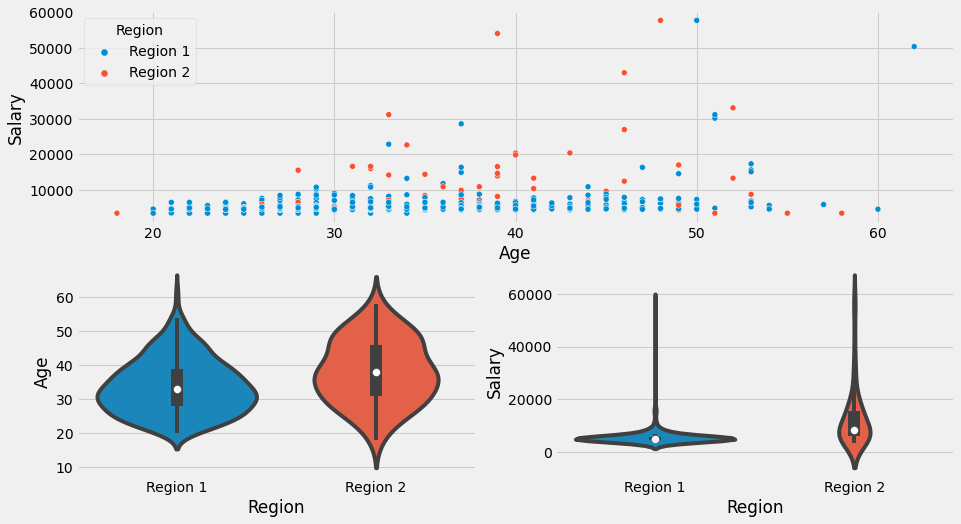

In [17]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,(1,2))
sns.scatterplot(data = df, x='Age', y='Salary', hue='Region')
plt.subplot(2,2,3)
sns.violinplot(data = df, x='Region', y='Age')
plt.subplot(2,2,4)
sns.violinplot(data = df, x='Region', y='Salary')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

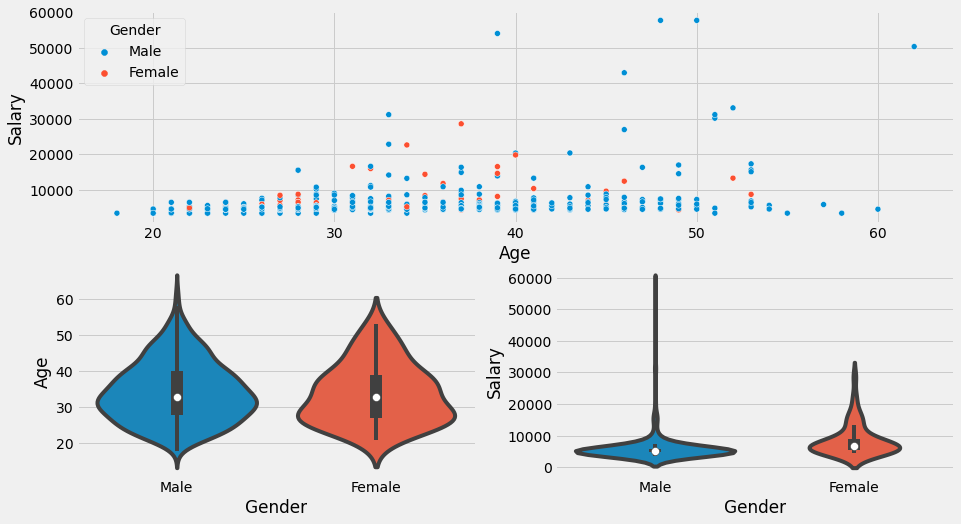

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,(1,2))
sns.scatterplot(data = df, x='Age', y='Salary', hue='Gender')
plt.subplot(2,2,3)
sns.violinplot(data = df, x='Gender', y='Age')
plt.subplot(2,2,4)
sns.violinplot(data = df, x='Gender', y='Salary')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

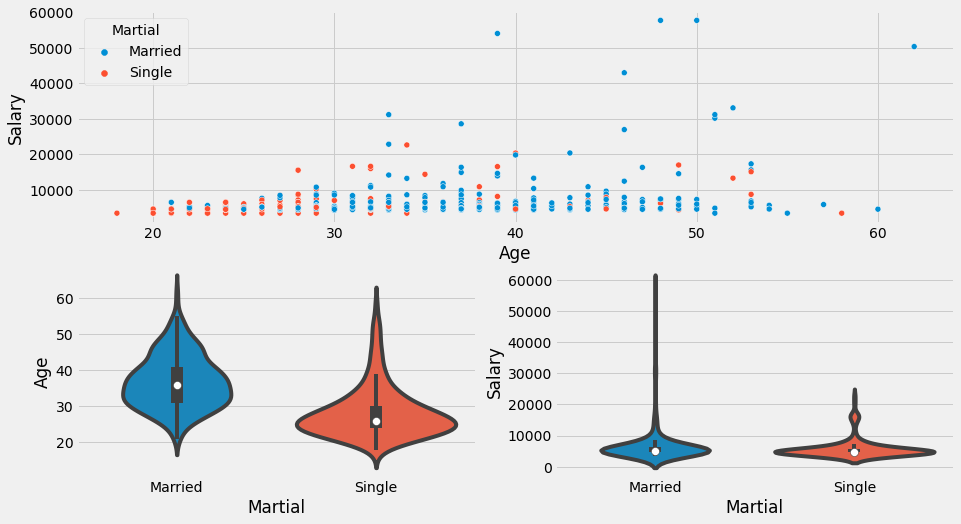

In [19]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,(1,2))
sns.scatterplot(data = df, x='Age', y='Salary', hue='Martial')
plt.subplot(2,2,3)
sns.violinplot(data = df, x='Martial', y='Age')
plt.subplot(2,2,4)
sns.violinplot(data = df, x='Martial', y='Salary')
plt.show

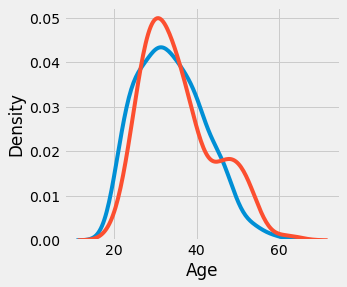

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.kdeplot(df[df['Statu']=='Blue-Collar']['Age'], label='Blue-Collar')
sns.kdeplot(df[df['Statu']=='White-Collar']['Age'], label='White-Collar')

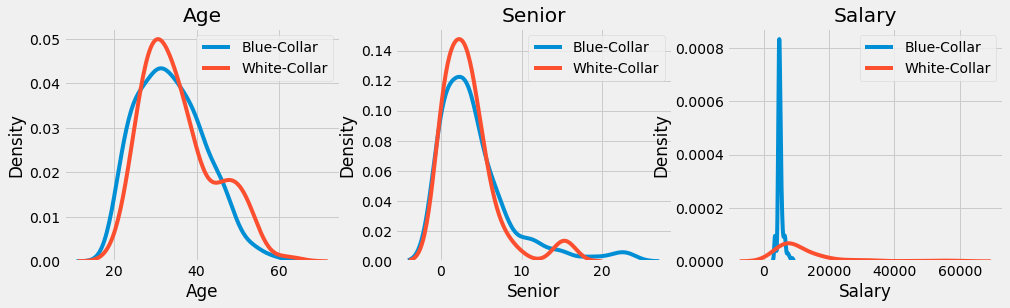

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.kdeplot(df[df['Statu'] == 'Blue-Collar']['Age'], label = 'Blue-Collar')
sns.kdeplot(df[df['Statu'] == 'White-Collar']['Age'], label = 'White-Collar')
plt.title('Age')
plt.legend()

plt.subplot(1,3,2)
sns.kdeplot(df[df['Statu'] == 'Blue-Collar']['Senior'], label = 'Blue-Collar')
sns.kdeplot(df[df['Statu'] == 'White-Collar']['Senior'], label = 'White-Collar')
plt.title('Senior')
plt.legend()

plt.subplot(1,3,3)
sns.kdeplot(df[df['Statu'] == 'Blue-Collar']['Salary'], label = 'Blue-Collar')
sns.kdeplot(df[df['Statu'] == 'White-Collar']['Salary'], label = 'White-Collar')
plt.title('Salary')
plt.legend()

plt.show()


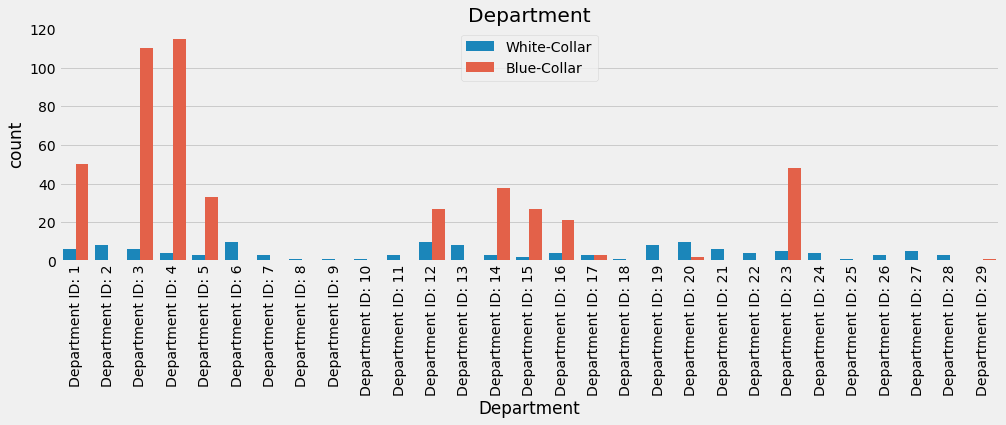

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x = 'Department', hue='Statu')
plt.xticks(rotation = 90)
plt.title('Department')
plt.legend()
plt.show()

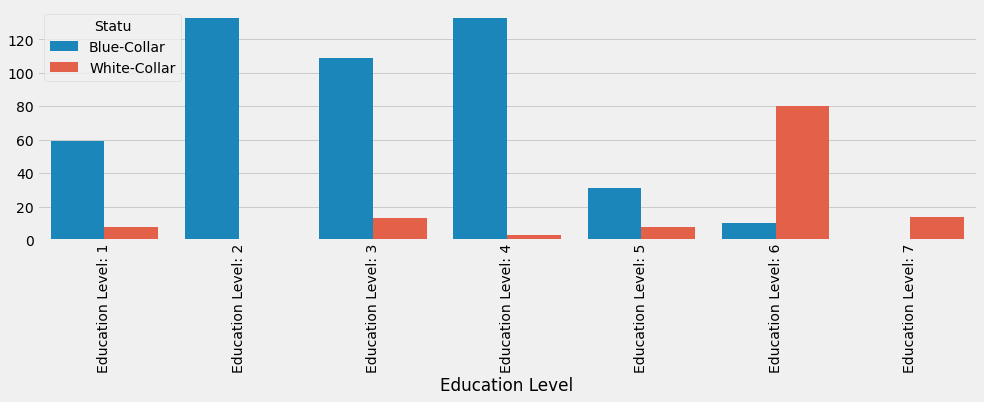

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(data = df.sort_values('Education Level'), x= 'Education Level', hue = 'Statu')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.show()

In [24]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Gender,object,0,0.0,2,[Male],0.33
1,Age,int64,0,0.0,41,"[41, 40, 24]",6.82
2,Senior,int64,0,0.0,22,"[5, 2, 4]",3.66
3,Region,object,0,0.0,2,[Region 1],0.33
4,Department,object,0,0.0,29,"[Department ID: 4, Department ID: 1]",4.83
5,Statu,object,0,0.0,2,[Blue-Collar],0.33
6,Martial,object,0,0.0,2,"[Single, Married]",0.33
7,Education Level,object,0,0.0,7,"[Education Level: 4, Education Level: 6]",1.16
8,Disability,object,0,0.0,2,[No],0.33
9,Salary,float64,0,0.0,443,"[7360.8, 5620.95, 3497.99]",73.71


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Region'] = le.fit_transform(df['Region'])
df['Statu'] = le.fit_transform(df['Statu'])
df['Martial'] = le.fit_transform(df['Martial'])
df['Disability'] = le.fit_transform(df['Disability'])

In [28]:
df.head()

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,0,Department ID: 1,1,0,Education Level: 6,0,14968.28
1,1,37,5,0,Department ID: 1,1,0,Education Level: 6,0,9352.53
2,1,33,1,0,Department ID: 1,1,0,Education Level: 6,0,7814.28
3,1,28,1,0,Department ID: 1,1,1,Education Level: 6,0,8545.82
4,0,27,3,0,Department ID: 1,1,1,Education Level: 6,0,5756.46


In [29]:
df['Department'].unique()

array(['Department ID: 1', 'Department ID: 2', 'Department ID: 3',
       'Department ID: 4', 'Department ID: 5', 'Department ID: 6',
       'Department ID: 7', 'Department ID: 8', 'Department ID: 9',
       'Department ID: 10', 'Department ID: 11', 'Department ID: 12',
       'Department ID: 13', 'Department ID: 14', 'Department ID: 15',
       'Department ID: 16', 'Department ID: 17', 'Department ID: 18',
       'Department ID: 19', 'Department ID: 20', 'Department ID: 21',
       'Department ID: 22', 'Department ID: 23', 'Department ID: 24',
       'Department ID: 25', 'Department ID: 26', 'Department ID: 27',
       'Department ID: 28', 'Department ID: 29'], dtype=object)

In [30]:
df['Department'] = df['Department'].replace(['Department ID: 1', 'Department ID: 2', 'Department ID: 3',
       'Department ID: 4', 'Department ID: 5', 'Department ID: 6',
       'Department ID: 7', 'Department ID: 8', 'Department ID: 9',
       'Department ID: 10', 'Department ID: 11', 'Department ID: 12',
       'Department ID: 13', 'Department ID: 14', 'Department ID: 15',
       'Department ID: 16', 'Department ID: 17', 'Department ID: 18',
       'Department ID: 19', 'Department ID: 20', 'Department ID: 21',
       'Department ID: 22', 'Department ID: 23', 'Department ID: 24',
       'Department ID: 25', 'Department ID: 26', 'Department ID: 27',
       'Department ID: 28', 'Department ID: 29'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])

In [31]:
df.head()

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,0,1,1,0,Education Level: 6,0,14968.28
1,1,37,5,0,1,1,0,Education Level: 6,0,9352.53
2,1,33,1,0,1,1,0,Education Level: 6,0,7814.28
3,1,28,1,0,1,1,1,Education Level: 6,0,8545.82
4,0,27,3,0,1,1,1,Education Level: 6,0,5756.46


In [32]:
df['Education Level'].unique()

array(['Education Level: 6', 'Education Level: 5', 'Education Level: 4',
       'Education Level: 7', 'Education Level: 3', 'Education Level: 1',
       'Education Level: 2'], dtype=object)

In [33]:
df['Education Level'] = df['Education Level'].replace(['Education Level: 1', 'Education Level: 2', 'Education Level: 3',
       'Education Level: 4', 'Education Level: 5', 'Education Level: 6',
       'Education Level: 7'], [1,2,3,4,5,6,7])

In [34]:
df.head()

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,0,1,1,0,6,0,14968.28
1,1,37,5,0,1,1,0,6,0,9352.53
2,1,33,1,0,1,1,0,6,0,7814.28
3,1,28,1,0,1,1,1,6,0,8545.82
4,0,27,3,0,1,1,1,6,0,5756.46


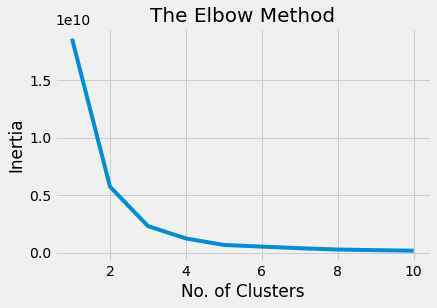

In [35]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

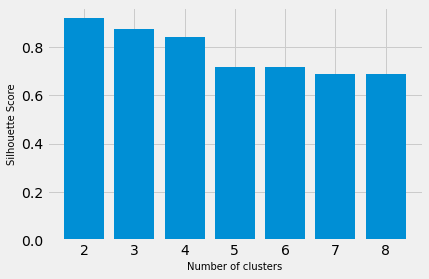

In [36]:
# silhouette coefficient
# standard: -1 s/d 1 => seberapa bagus model mendefinisikan cluster
from sklearn import metrics
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        metrics.silhouette_score(df, 
                                 KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [54]:
km = KMeans(n_clusters = 3, random_state = 42)
cluster = km.fit_predict(df)

In [55]:
# mengetahui posisi centroids
km.cluster_centers_

array([[6.96969697e-01, 4.08181818e+01, 4.24242424e+00, 6.36363636e-01,
        1.46666667e+01, 1.00000000e+00, 3.63636364e-01, 5.78787879e+00,
        3.03030303e-02, 1.88557227e+04, 7.57575758e-01],
       [9.23623446e-01, 3.37122558e+01, 4.03730018e+00, 7.28241563e-02,
        8.89698046e+00, 1.56305506e-01, 3.09058615e-01, 3.29129663e+00,
        2.84191829e-02, 5.42344924e+03, 1.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 3.40000000e+00, 6.00000000e-01,
        1.46000000e+01, 1.00000000e+00, 0.00000000e+00, 6.40000000e+00,
        0.00000000e+00, 5.25679820e+04, 0.00000000e+00]])

In [56]:
df['cluster']=cluster

In [57]:
df

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary,cluster
0,1,37,3,0,1,1,0,6,0,14968.28,0
1,1,37,5,0,1,1,0,6,0,9352.53,1
2,1,33,1,0,1,1,0,6,0,7814.28,1
3,1,28,1,0,1,1,1,6,0,8545.82,1
4,0,27,3,0,1,1,1,6,0,5756.46,1
...,...,...,...,...,...,...,...,...,...,...,...
596,1,22,0,0,3,0,1,4,0,6553.21,1
597,1,24,0,0,14,0,1,4,0,6553.21,1
598,1,35,0,0,23,0,0,3,0,6553.21,1
599,1,36,0,0,23,0,0,5,0,6553.21,1


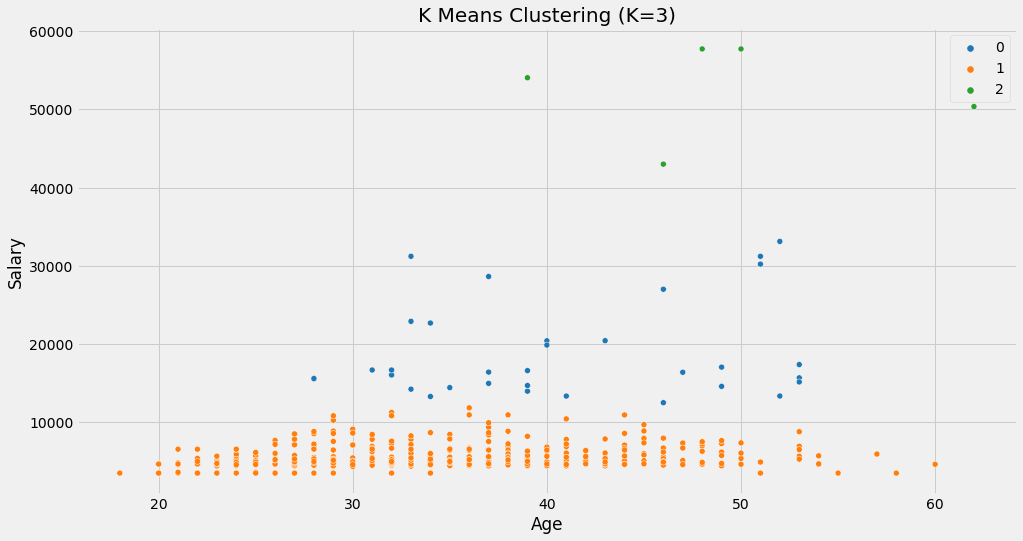

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Age',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.show()

In [65]:
df1 = df

In [66]:
df1

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,Male,22,0,Region 1,Department ID: 3,Blue-Collar,Single,Education Level: 4,No,6553.21
597,Male,24,0,Region 1,Department ID: 14,Blue-Collar,Single,Education Level: 4,No,6553.21
598,Male,35,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 3,No,6553.21
599,Male,36,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 5,No,6553.21


In [67]:
df1['cluster'] = cluster

In [68]:
df1.head()

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary,cluster
0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28,0
1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53,1
2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28,1
3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82,1
4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46,1


In [72]:
cluster_0 = df1[df1['cluster'] == 0]
cluster_0.describe()
# Salary 12500 - 33114

,Age,Senior,Salary,cluster
count,33.000000,33.000000,33.000000,33.0
mean,40.818182,4.242424,18855.722727,0.0
std,8.060143,4.670588,6045.537225,0.0
min,28.000000,0.000000,12497.380000,0.0
25%,34.000000,1.000000,14696.850000,0.0
50%,39.000000,3.000000,16407.950000,0.0
75%,49.000000,6.000000,20426.300000,0.0
max,53.000000,16.000000,33114.050000,0.0


In [73]:
cluster_1 = df1[df1['cluster'] == 1]
cluster_1.describe()
# Salary 3497 - 11841

,Age,Senior,Salary,cluster
count,563.000000,563.000000,563.000000,563.0
mean,33.712256,4.037300,5423.449236,1.0
std,8.041638,4.426187,1327.290196,0.0
min,18.000000,0.000000,3497.100000,1.0
25%,28.000000,1.000000,4663.950000,1.0
50%,33.000000,3.000000,4953.260000,1.0
75%,39.000000,5.000000,5663.750000,1.0
max,60.000000,23.000000,11841.070000,1.0


In [74]:
cluster_2 = df1[df1['cluster'] == 2]
cluster_2.describe()
# Salary 43000 - 57722

,Age,Senior,Salary,cluster
count,5.0000,5.000000,5.000000,5.0
mean,49.0000,3.400000,52567.982000,2.0
std,8.3666,2.792848,6160.609252,0.0
min,39.0000,1.000000,42995.650000,2.0
25%,46.0000,2.000000,50358.970000,2.0
50%,48.0000,2.000000,54040.650000,2.0
75%,50.0000,4.000000,57722.320000,2.0
max,62.0000,8.000000,57722.320000,2.0


Text(0.5, 1.0, 'Gender by Cluster')

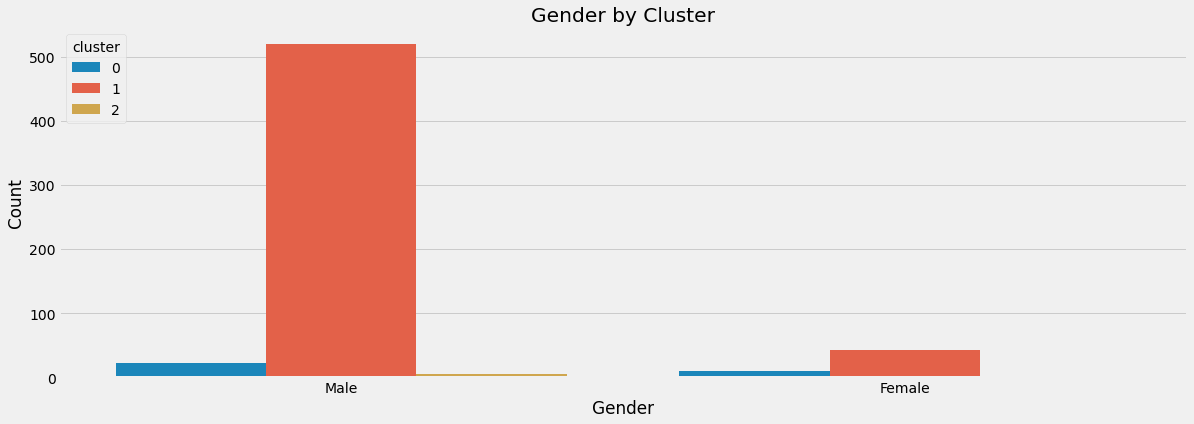

In [69]:
plt.figure(figsize=(18,6))
sns.countplot(data=df1, x='Gender', hue='cluster')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender by Cluster')

Text(0.5, 1.0, 'Senior by Cluster')

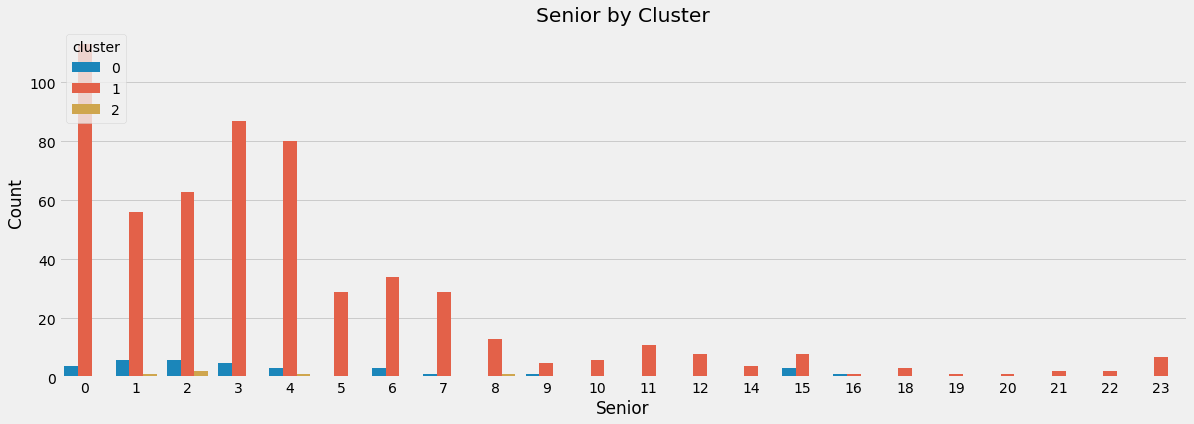

In [76]:
plt.figure(figsize=(18,6))
sns.countplot(data=df1, x='Senior', hue='cluster')
plt.xlabel('Senior')
plt.ylabel('Count')
plt.title('Senior by Cluster')

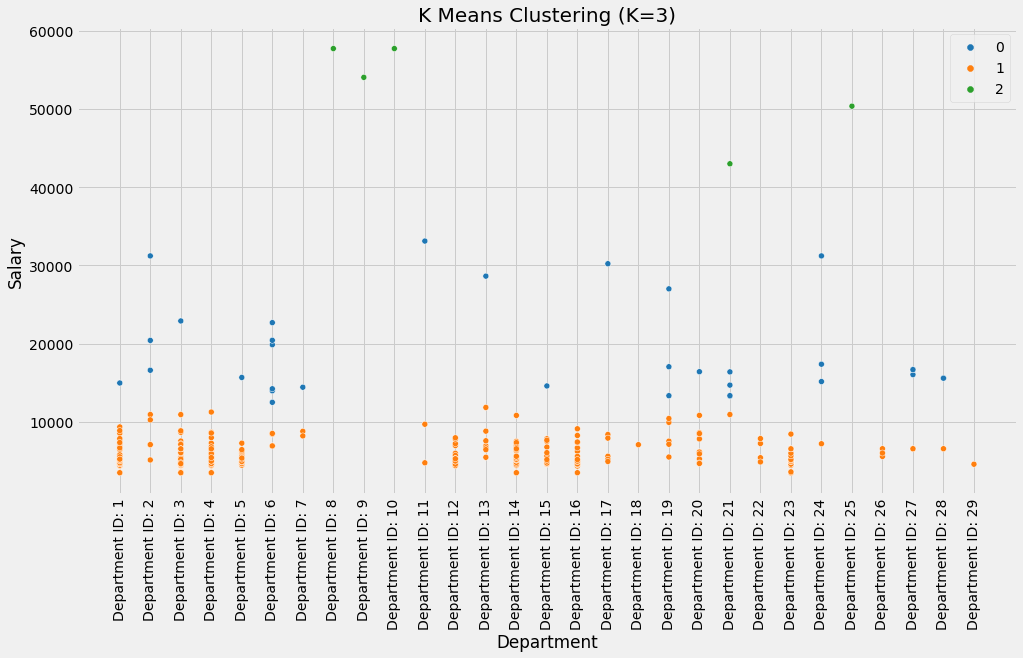

In [78]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Department',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

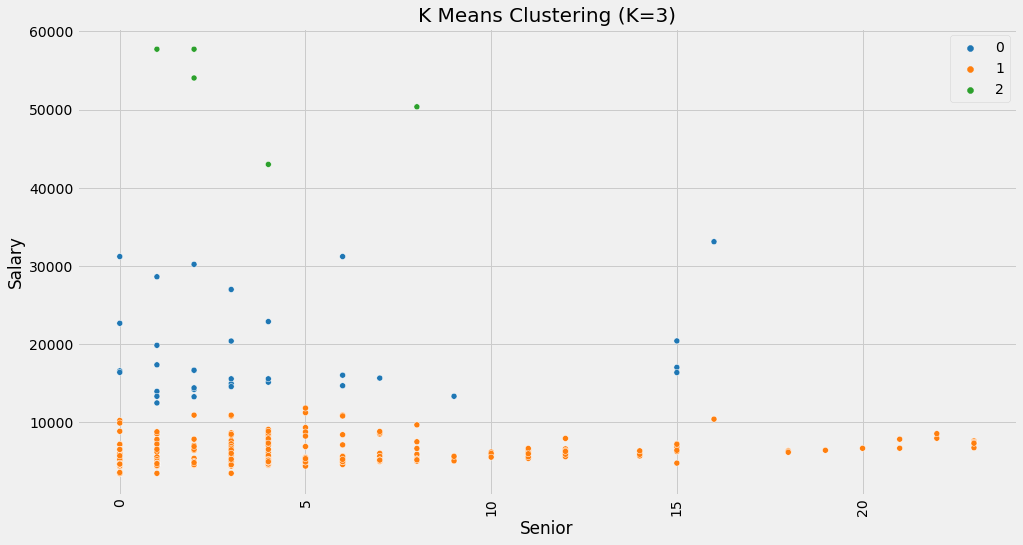

In [79]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Senior',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

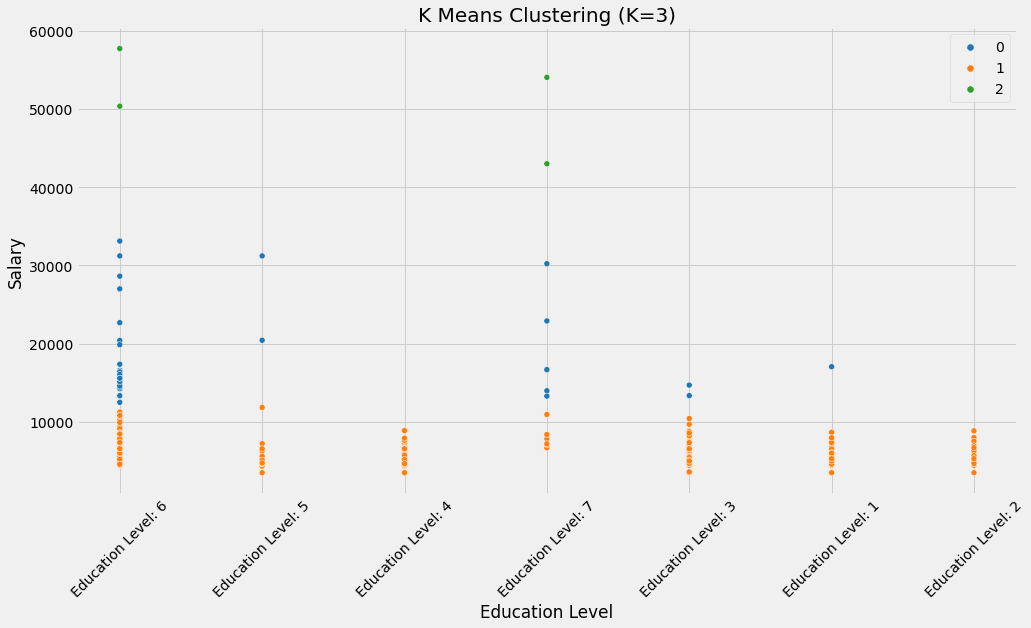

In [81]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Education Level',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.xticks(rotation=45)
plt.show()

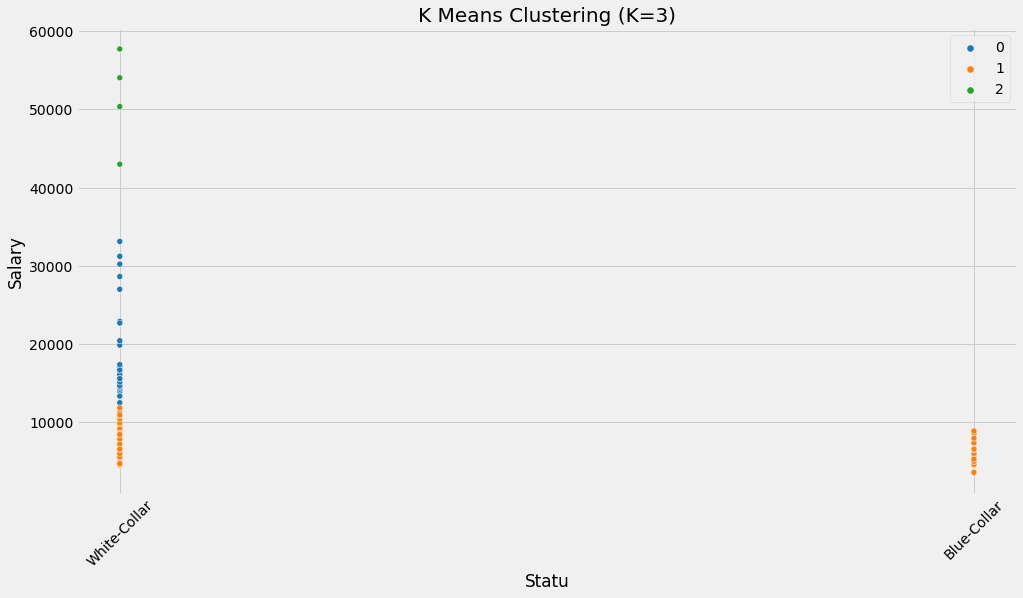

In [82]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Statu',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.xticks(rotation=45)
plt.show()

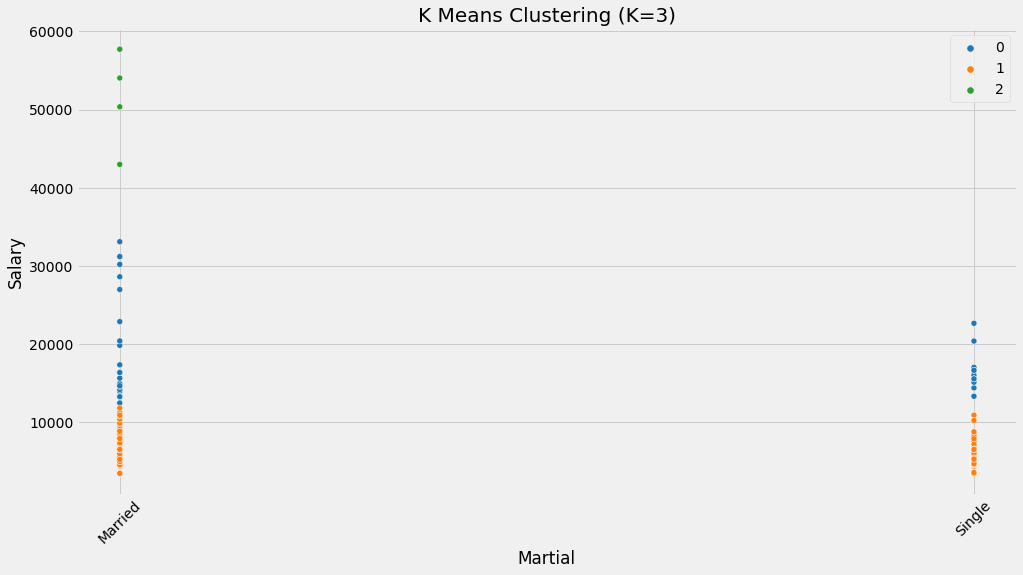

In [83]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Martial',y='Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.xticks(rotation=45)
plt.show()